In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Training_Data_Set.csv')
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4.0,4.0,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4.0,5.0,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4.0,5.0,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4.0,5.0,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5.0,5.0,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4.0,5.0,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,NaN,NaN,diesel,874352.25


In [4]:
(df.isnull().sum()/len(df))*100

Id                      0.000000
Maker                   0.000000
model                   0.000000
Location                0.000000
Distance                2.262917
Owner Type              0.000000
manufacture_year        0.000000
Age of car              0.000000
engine_displacement     0.000000
engine_power            2.688966
body_type              92.271326
Vroom Audit Rating      0.000000
transmission            0.000000
door_count             14.078296
seat_count             15.903952
fuel_type               0.000000
Price                   0.000000
dtype: float64

In [5]:
df.drop(columns='body_type',inplace=True)

In [6]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'Price'],
      dtype='object')

In [7]:
df['Distance '].mean()

np.float64(94546.2624464668)

In [8]:
df['Distance '].median()

np.float64(65520.0)

In [9]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [10]:
df['Distance '].isnull().sum()

np.int64(0)

In [11]:
df['engine_power'].mean()

np.float64(100.44834472693755)

In [12]:
df['engine_power'].median()

np.float64(91.0)

In [13]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [14]:
df['engine_power'].isnull().sum()

np.int64(0)

In [15]:
df['door_count'].median()

np.float64(4.0)

In [16]:
df['door_count'].fillna(df['door_count'].median(),inplace=True)

In [17]:
df['door_count'].isnull().sum()

np.int64(0)

In [18]:
df['seat_count'].median()

np.float64(5.0)

In [19]:
df['seat_count'].fillna(df['seat_count'].median(),inplace=True)

In [20]:
df['seat_count'].isnull().sum()

np.int64(0)

In [21]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [22]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
Price                  float64
dtype: object

In [23]:
df1=df.select_dtypes(include='float').astype(int)
df1.dtypes

Distance        int64
engine_power    int64
door_count      int64
seat_count      int64
Price           int64
dtype: object

In [24]:
df2=df.select_dtypes(include='int')
df2.dtypes

Id                     int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
Vroom Audit Rating     int64
dtype: object

In [25]:
df3=df.select_dtypes(include='object')
df3.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [26]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [27]:
df3['Maker'].unique

<bound method Series.unique of 0         skoda
1          fiat
2           bmw
3        nissan
4           bmw
          ...  
53510     skoda
53511     skoda
53512       bmw
53513    toyota
53514       bmw
Name: Maker, Length: 53515, dtype: object>

In [28]:
df3['Maker']=le.fit_transform(df3['Maker'])

In [29]:
df3['model']=le.fit_transform(df3['model'])

In [30]:
df3['Location']=le.fit_transform(df3['Location'])

In [31]:
df3['Owner Type']=le.fit_transform(df3['Owner Type'])

In [32]:
df3['transmission']=le.fit_transform(df3['transmission'])

In [33]:
df3['fuel_type']=le.fit_transform(df3['fuel_type'])

In [34]:
Df=pd.concat((df1,df2,df3),axis=1)

In [35]:
Df.dtypes

Distance               int64
engine_power           int64
door_count             int64
seat_count             int64
Price                  int64
Id                     int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
Vroom Audit Rating     int64
Maker                  int64
model                  int64
Location               int64
Owner Type             int64
transmission           int64
fuel_type              int64
dtype: object

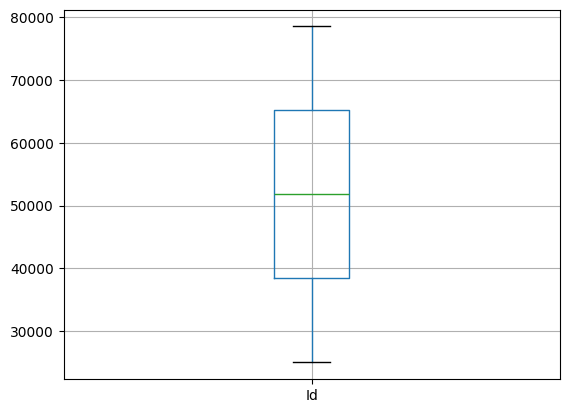

In [36]:
Df[['Id']].boxplot()
plt.show()

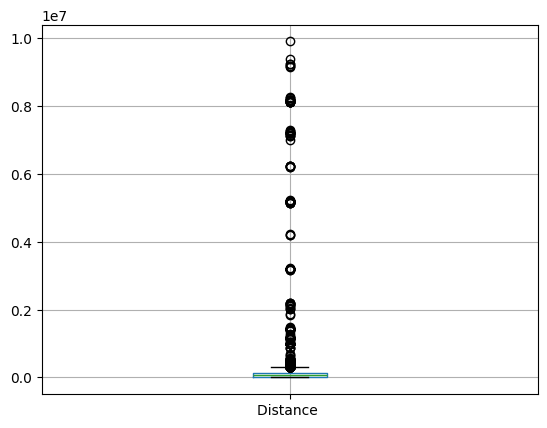

In [37]:
Df[['Distance ']].boxplot()
plt.show()

In [38]:
q1=Df['Distance '].quantile(0.25)
q1

np.float64(16507.0)

In [39]:
q3=Df['Distance '].quantile(0.75)
q3

np.float64(133304.0)

In [40]:
iqr=q3-q1
iqr

np.float64(116797.0)

In [41]:
LL=q1-(1.5*iqr)
LL

np.float64(-158688.5)

In [42]:
UL=q3+(1.5*iqr)
UL

np.float64(308499.5)

In [43]:
Df['Distance ']=Df['Distance '][(Df['Distance ']>LL)&(Df['Distance ']<UL)]

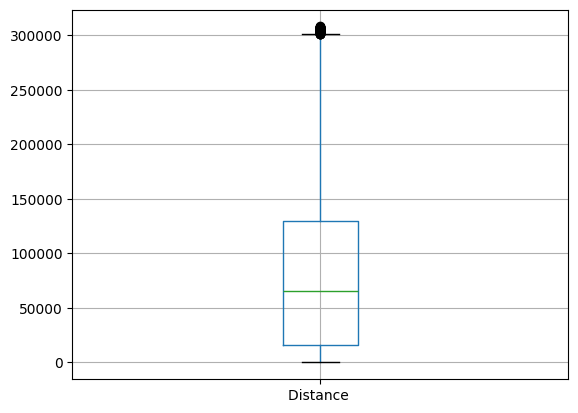

In [44]:
Df[['Distance ']].boxplot()
plt.show()

In [45]:
q1=Df['engine_power'].quantile(0.25)
q1

np.float64(74.0)

In [46]:
q3=Df['engine_power'].quantile(0.75)
q3

np.float64(125.0)

In [47]:
iqr=q3-q1
iqr

np.float64(51.0)

In [48]:
LL=q1-(1.5*iqr)
LL

np.float64(-2.5)

In [49]:
UL=q3+(1.5*iqr)
UL

np.float64(201.5)

In [50]:
Df['engine_power']=Df['engine_power'][(Df['engine_power']>LL)&(Df['engine_power']<UL)]

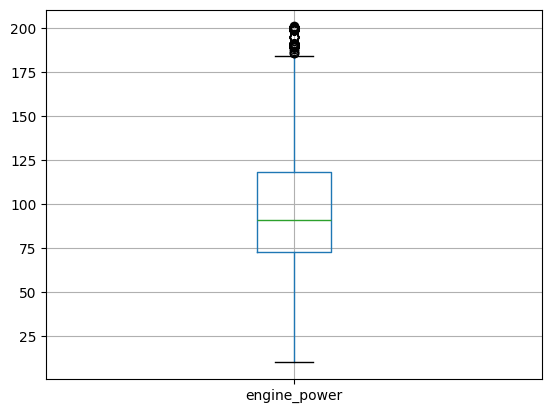

In [51]:
Df[['engine_power']].boxplot()
plt.show()

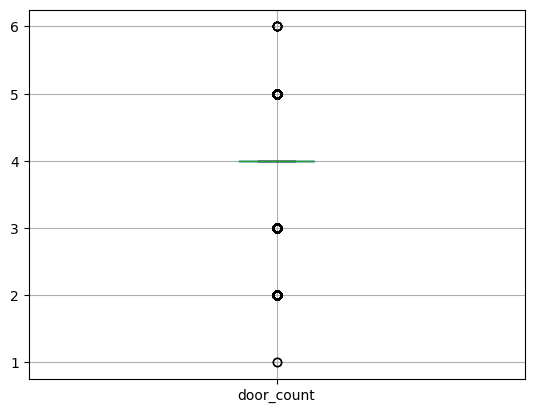

In [52]:
Df[['door_count']].boxplot()
plt.show()

In [53]:
q1=Df['door_count'].quantile(0.25)
q1

np.float64(4.0)

In [54]:
q3=Df['door_count'].quantile(0.75)
q3

np.float64(4.0)

In [55]:
iqr=q3-q1
iqr

np.float64(0.0)

In [56]:
LL=q1-(1.5*iqr)
LL

np.float64(4.0)

In [57]:
UL=q3+(1.5*iqr)
UL

np.float64(4.0)

In [58]:
Df['door_count']=Df['door_count'][(Df['door_count']>LL)&(Df['door_count']<UL)]

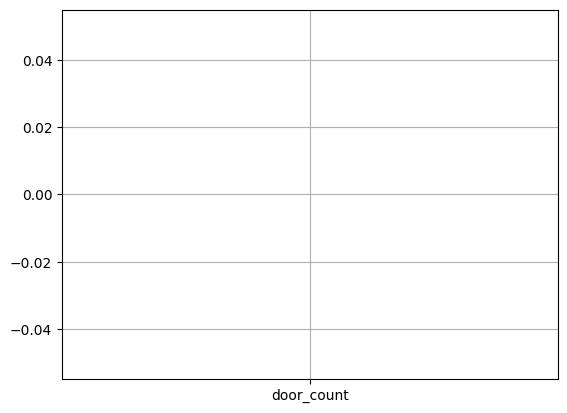

In [59]:
Df[['door_count']].boxplot()
plt.show()

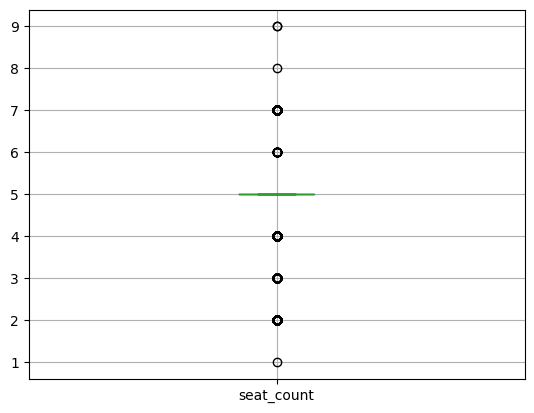

In [60]:
Df[['seat_count']].boxplot()
plt.show()

In [61]:
q1=Df['seat_count'].quantile(0.25)
q1

np.float64(5.0)

In [62]:
q3=Df['seat_count'].quantile(0.75)
q3

np.float64(5.0)

In [63]:
iqr=q3-q1
iqr

np.float64(0.0)

In [64]:
LL=q1-(1.5*iqr)
LL

np.float64(5.0)

In [65]:
UL=q3+(1.5*iqr)
UL

np.float64(5.0)

In [66]:
Df['seat_count']=Df['seat_count'][(Df['seat_count']>LL)&(Df['seat_count']<UL)]

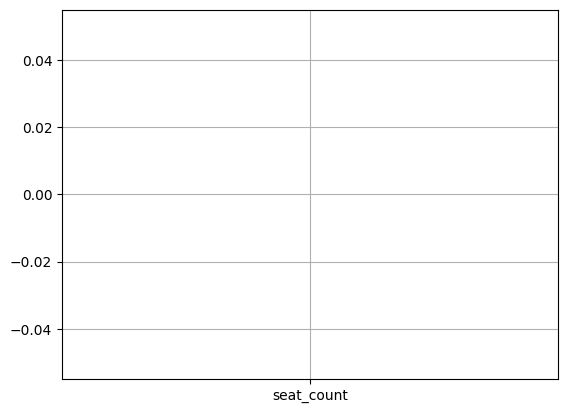

In [67]:
Df[['seat_count']].boxplot()
plt.show()

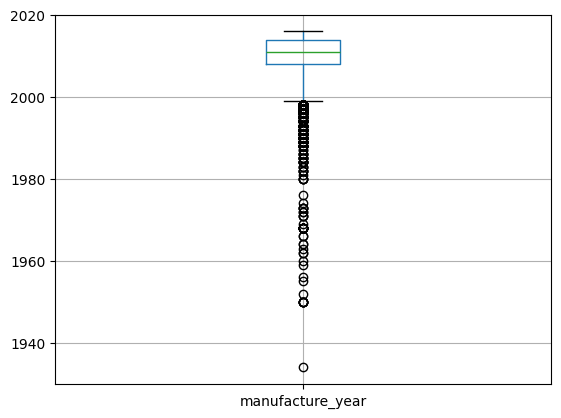

In [68]:
Df[['manufacture_year']].boxplot()
plt.show()

In [69]:
q1=Df['manufacture_year'].quantile(0.25)
q1

np.float64(2008.0)

In [70]:
q3=Df['manufacture_year'].quantile(0.75)
q3

np.float64(2014.0)

In [71]:
iqr=q3-q1
iqr

np.float64(6.0)

In [72]:
LL=q1-(1.5*iqr)
LL

np.float64(1999.0)

In [73]:
UL=q3+(1.5*iqr)
UL

np.float64(2023.0)

In [74]:
Df['manufacture_year']=Df['manufacture_year'][(Df['manufacture_year']>LL)&(Df['manufacture_year']<UL)]

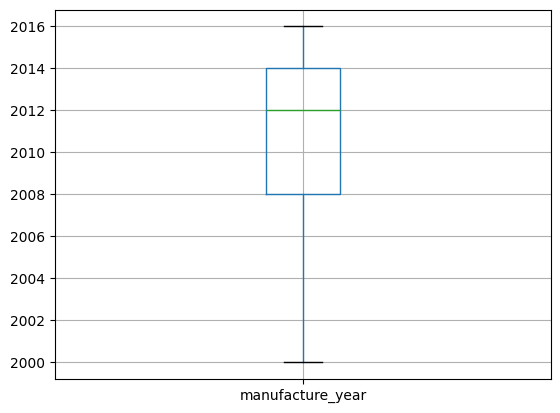

In [75]:
Df[['manufacture_year']].boxplot()
plt.show()

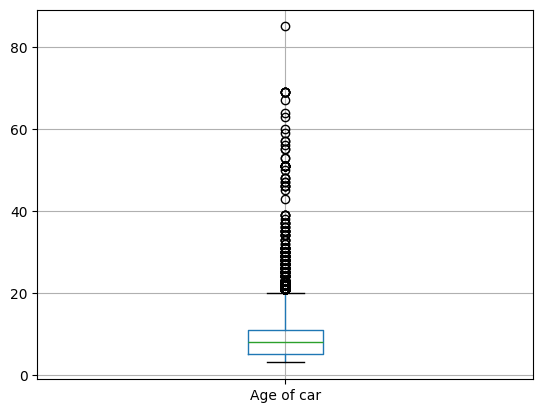

In [76]:
Df[['Age of car']].boxplot()
plt.show()

In [77]:
q1=Df['Age of car'].quantile(0.25)
q1

np.float64(5.0)

In [78]:
q3=Df['Age of car'].quantile(0.75)
q3

np.float64(11.0)

In [79]:
iqr=q3-q1
iqr

np.float64(6.0)

In [80]:
LL=q1-(1.5*iqr)
LL

np.float64(-4.0)

In [81]:
UL=q3+(1.5*iqr)
UL

np.float64(20.0)

In [82]:
Df['Age of car']=Df['Age of car'][(Df['Age of car']>LL)&(Df['Age of car']<UL)]

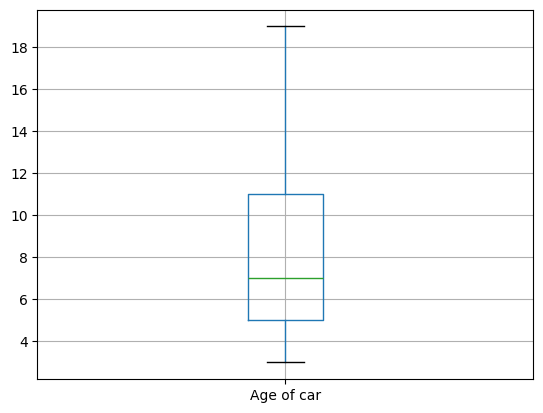

In [83]:
Df[['Age of car']].boxplot()
plt.show()

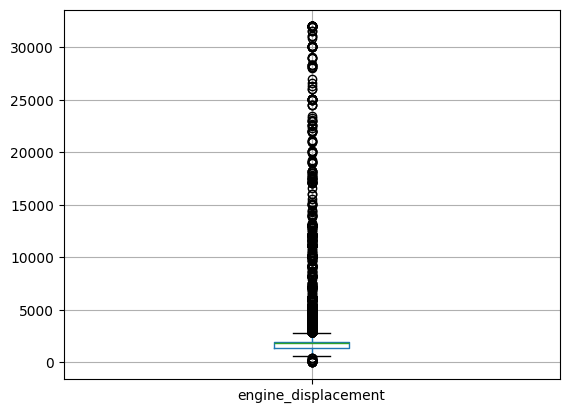

In [84]:
Df[['engine_displacement']].boxplot()
plt.show()

In [85]:
q1=Df['engine_displacement'].quantile(0.25)
q1

np.float64(1395.0)

In [86]:
q3=Df['engine_displacement'].quantile(0.75)
q3

np.float64(1995.0)

In [87]:
iqr=q3-q1
iqr

np.float64(600.0)

In [88]:
LL=q1-(1.5*iqr)
LL

np.float64(495.0)

In [89]:
UL=q3+(1.5*iqr)
UL

np.float64(2895.0)

In [90]:
Df['engine_displacement']=Df['engine_displacement'][(Df['engine_displacement']>LL)&(Df['engine_displacement']<UL)]

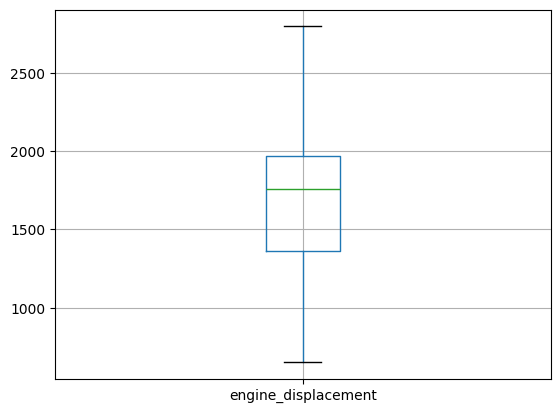

In [91]:
Df[['engine_displacement']].boxplot()
plt.show()

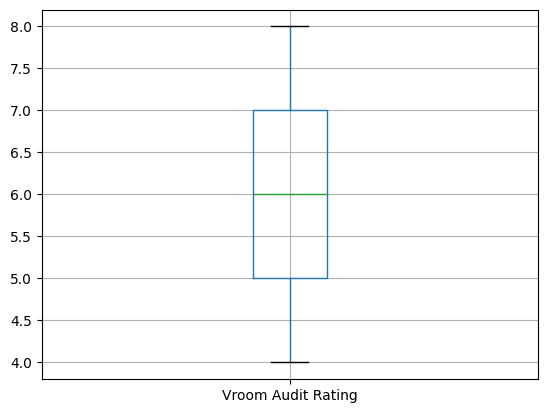

In [92]:
Df[['Vroom Audit Rating']].boxplot()
plt.show()

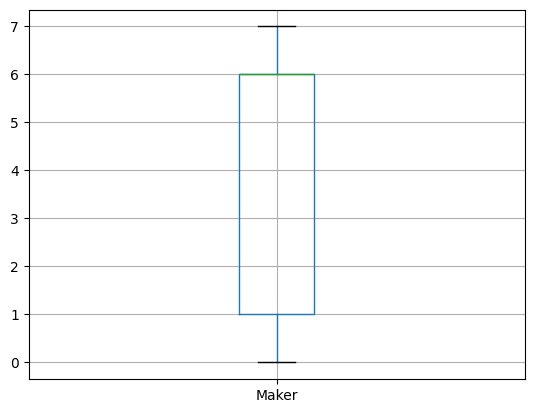

In [93]:
Df[['Maker']].boxplot()
plt.show()

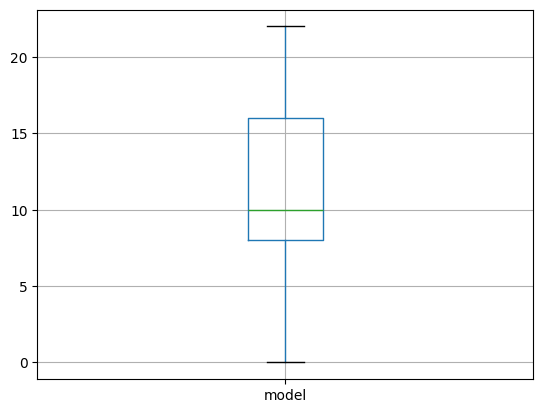

In [94]:
Df[['model']].boxplot()
plt.show()

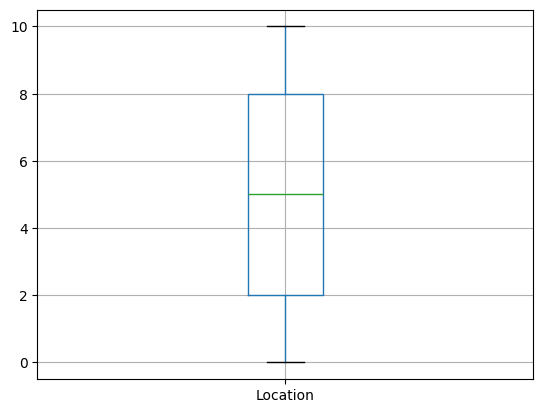

In [95]:
Df[['Location']].boxplot()
plt.show()

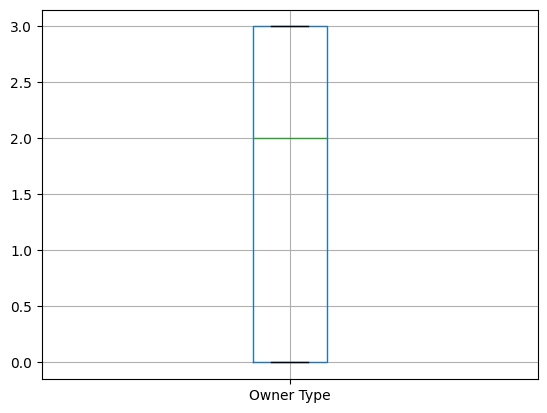

In [96]:
Df[['Owner Type']].boxplot()
plt.show()

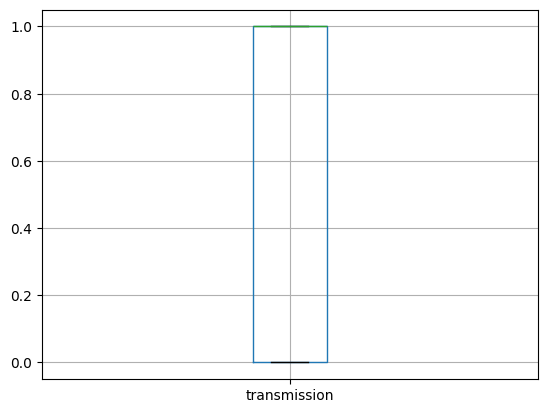

In [97]:
Df[['transmission']].boxplot()
plt.show()

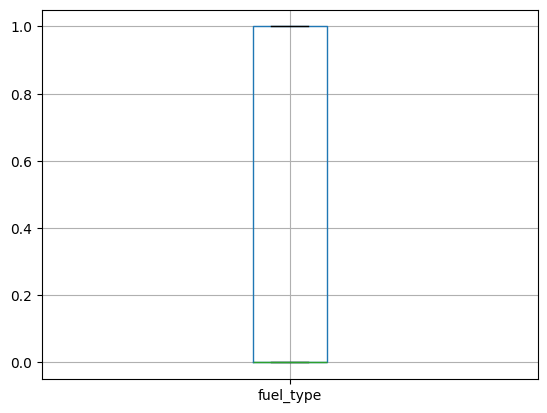

In [98]:
Df[['fuel_type']].boxplot()
plt.show()

In [99]:
Df.isnull().sum()

Distance                 595
engine_power            1407
door_count             53515
seat_count             53515
Price                      0
Id                         0
manufacture_year        1325
Age of car              1325
engine_displacement     5651
Vroom Audit Rating         0
Maker                      0
model                      0
Location                   0
Owner Type                 0
transmission               0
fuel_type                  0
dtype: int64

In [100]:
Df['Distance '].median()

np.float64(65520.0)

In [101]:
Df['Distance '].fillna(Df['Distance '].median(),inplace=True)

In [102]:
Df['Distance '].isnull().sum()

np.int64(0)

In [103]:
q1=Df['Distance '].quantile(0.25)
q1

np.float64(16507.0)

In [104]:
q3=Df['Distance '].quantile(0.75)
q3

np.float64(129000.0)

In [105]:
iqr=q3-q1
iqr

np.float64(112493.0)

In [106]:
LL=q1-(1.5*iqr)
LL

np.float64(-152232.5)

In [107]:
UL=q3+(1.5*iqr)
UL

np.float64(297739.5)

In [108]:
Df['Distance']=Df['Distance '][(Df['Distance ']>LL)& (Df['Distance ']<UL)]

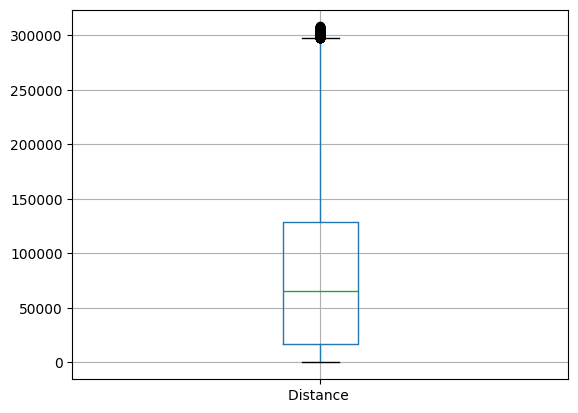

In [109]:
Df[['Distance ']].boxplot()
plt.show()

In [110]:
Df['engine_power'].median()

np.float64(91.0)

In [111]:
Df['engine_power'].fillna(Df['engine_power'].median(),inplace=True)

In [112]:
q1=Df['engine_power'].quantile(0.25)
q1

np.float64(74.0)

In [113]:
q3=Df['engine_power'].quantile(0.75)
q3

np.float64(112.0)

In [114]:
iqr=q3-q1
iqr

np.float64(38.0)

In [115]:
LL=q1-(1.5*iqr)
LL

np.float64(17.0)

In [116]:
UL=q3+(1.5*iqr)
UL

np.float64(169.0)

In [117]:
Df['engine_power']=Df['engine_power'][(Df['engine_power']>LL)& (Df['engine_power']<UL)]

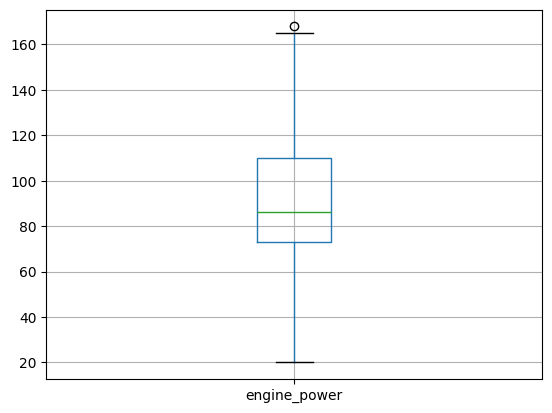

In [118]:
Df[['engine_power']].boxplot()
plt.show()

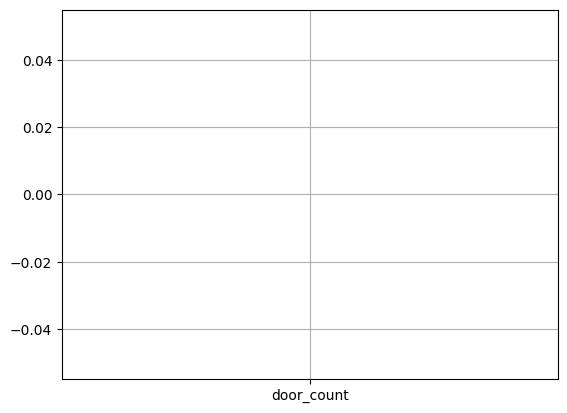

In [119]:
Df[['door_count']].boxplot()
plt.show()

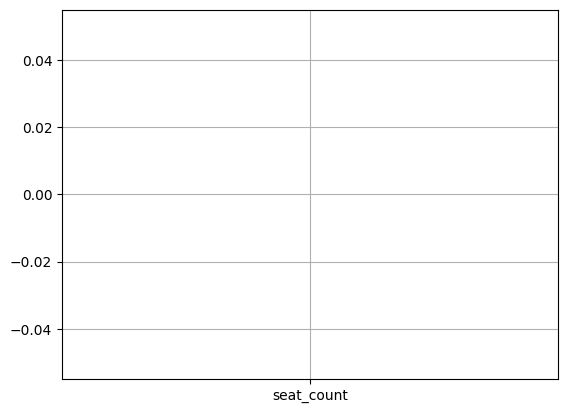

In [120]:
Df[['seat_count']].boxplot()
plt.show()

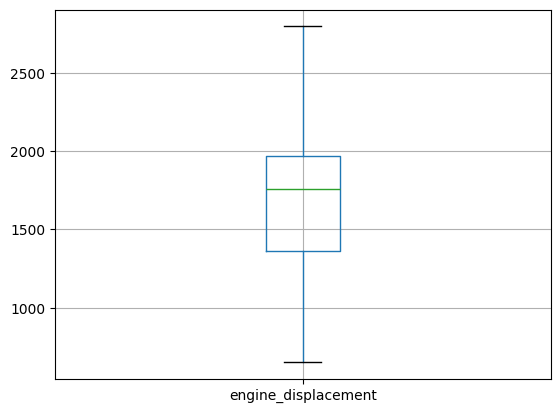

In [121]:
Df[['engine_displacement']].boxplot()
plt.show()

In [122]:
Df.dropna(subset='engine_displacement',inplace=True)

In [123]:
Df.isnull().sum()

Distance                   0
engine_power             719
door_count             47864
seat_count             47864
Price                      0
Id                         0
manufacture_year        1288
Age of car              1288
engine_displacement        0
Vroom Audit Rating         0
Maker                      0
model                      0
Location                   0
Owner Type                 0
transmission               0
fuel_type                  0
Distance                  98
dtype: int64

In [124]:
Df.dtypes

Distance               float64
engine_power           float64
door_count             float64
seat_count             float64
Price                    int64
Id                       int64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
Vroom Audit Rating       int64
Maker                    int64
model                    int64
Location                 int64
Owner Type               int64
transmission             int64
fuel_type                int64
Distance               float64
dtype: object

In [125]:
Df['Distance ']=le.fit_transform(Df['Distance '])

In [126]:
Df['manufacture_year']=le.fit_transform(Df['manufacture_year'])

In [127]:
Df['Age of car']=le.fit_transform(Df['Age of car'])

In [128]:
Df['engine_displacement']=le.fit_transform(Df['engine_displacement'])

In [129]:
Df['engine_power']=le.fit_transform(Df['engine_power'])

In [130]:
Df['seat_count']=le.fit_transform(Df['seat_count'])

In [131]:
Df['door_count']=le.fit_transform(Df['door_count'])

In [132]:
Df['Price']=le.fit_transform(Df['Price'])

In [133]:
Df.dtypes

Distance                 int64
engine_power             int64
door_count               int64
seat_count               int64
Price                    int64
Id                       int64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
Vroom Audit Rating       int64
Maker                    int64
model                    int64
Location                 int64
Owner Type               int64
transmission             int64
fuel_type                int64
Distance               float64
dtype: object

In [134]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [135]:
Df.columns

Index(['Distance ', 'engine_power', 'door_count', 'seat_count', 'Price', 'Id',
       'manufacture_year', 'Age of car', 'engine_displacement',
       'Vroom Audit Rating', 'Maker', 'model', 'Location', 'Owner Type',
       'transmission', 'fuel_type', 'Distance'],
      dtype='object')

In [136]:
X_train=Df[['Maker','model','Location','Owner Type', 'transmission','fuel_type','Distance ','engine_power','manufacture_year','Age of car','engine_displacement']]
y_train=Df[['Price']]

In [137]:
X_train

,Maker,model,Location,Owner Type,transmission,fuel_type,Distance,engine_power,manufacture_year,Age of car,engine_displacement
0,6,8,0,2,1,1,7624,104,17,17,175
1,2,9,0,3,1,1,4178,17,12,4,51
2,1,18,5,3,0,0,5974,67,14,2,193
3,5,6,9,3,1,1,5798,99,11,5,121
5,6,8,2,0,1,0,1642,71,15,1,178
...,...,...,...,...,...,...,...,...,...,...,...
53508,6,8,2,1,1,0,16556,65,7,9,198
53509,7,21,2,3,1,1,0,16,15,1,15
53510,6,8,4,1,1,0,4373,39,14,2,115
53511,6,8,1,1,1,0,16006,39,9,7,167


In [138]:
y_train

,Price
0,3422
1,2216
2,16512
3,7658
5,12519
...,...
53508,1810
53509,4867
53510,11054
53511,3135


In [139]:
standardize=pd.DataFrame(ss.fit_transform(X_train),columns=X_train.columns)

In [140]:
X_train=standardize[['Maker','model','Location','Owner Type', 'transmission','fuel_type','Distance ','engine_power','manufacture_year','Age of car','engine_displacement']]
y_train=standardize[['Price']]

KeyError: "None of [Index(['Price'], dtype='object')] are in the [columns]"

In [141]:
from sklearn.linear_model import LinearRegression
ll=LinearRegression()

In [142]:
ll.fit(X_train,y_train)

LinearRegression()

In [143]:
ll.score(X_train,y_train)

0.8589701430062617

In [145]:
DF=pd.read_csv('Test_Data_Set.csv')
DF

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type
0,11001,skoda,octavia,Mumbai,150000.0,First,2007,12,1595,75.0,NaN,5,man,4.0,5.0,petrol
1,11002,skoda,rapid,Coimbatore,29376.0,Third,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel
2,11003,skoda,octavia,Coimbatore,30563.0,Second,2014,5,1968,110.0,NaN,5,man,5.0,5.0,diesel
3,11004,audi,q3,Delhi,8650.0,Fourth & Above,2015,4,1968,110.0,NaN,8,auto,4.0,5.0,diesel
4,11005,audi,tt,Chennai,6400.0,Third,2015,4,1984,169.0,NaN,4,auto,2.0,NaN,petrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,16611,skoda,octavia,Mumbai,149976.0,First,2011,8,1968,103.0,NaN,8,man,4.0,5.0,diesel
5611,16612,skoda,superb,Ahmedabad,332000.0,First,2005,14,1896,96.0,NaN,6,man,4.0,5.0,diesel
5612,16613,skoda,octavia,Bangalore,230800.0,Second,2005,14,1896,77.0,NaN,7,man,5.0,5.0,diesel
5613,16614,nissan,qashqai,Jaipur,63480.0,Third,2011,8,1997,104.0,NaN,5,man,4.0,7.0,petrol


In [146]:
DF.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
dtype: object

In [147]:
DF.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

In [148]:
X_test=Df[['Maker','model','Location','Owner Type', 'transmission','fuel_type','Distance ','engine_power','manufacture_year','Age of car','engine_displacement']]

In [149]:
standardize=pd.DataFrame(ss.fit_transform(X_test),columns=X_test.columns)

In [150]:
X_test=standardize[['Maker','model','Location','Owner Type', 'transmission','fuel_type','Distance ','engine_power','manufacture_year','Age of car','engine_displacement']]

In [151]:
from sklearn.linear_model import LinearRegression
ll=LinearRegression()

In [152]:
y_predict=pd.DataFrame(ll.predict(X_test))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [153]:
y_predicted=ll.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [154]:
y_predicted

NameError: name 'y_predicted' is not defined